In [49]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("train.csv")

# Basic dataset info
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
# Shape and data types
df.info()

# Summary statistics
df.describe()

# Check missing values
df.isnull().sum()

# Value counts for categorical features
df['Sex'].value_counts()
df['Embarked'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


S    644
C    168
Q     77
Name: Embarked, dtype: int64

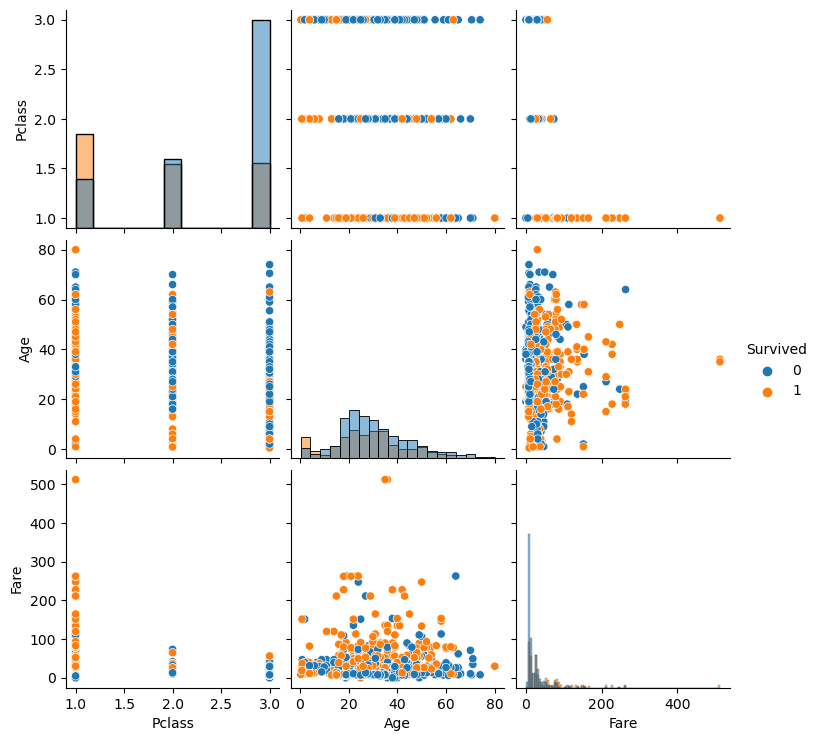

In [51]:
# Pairplot
sns.pairplot(
    df[['Survived', 'Pclass', 'Age', 'Fare']].dropna(),
    hue='Survived', diag_kind='hist')
plt.show()

### Observations
- **Pclass vs Fare**: Higher class → Higher fare.
- **Age vs Fare**: No clear trend, but older high-fare passengers seem to survive more.
- **Survival trends**: Survivors cluster in higher fare and lower Pclass zones.

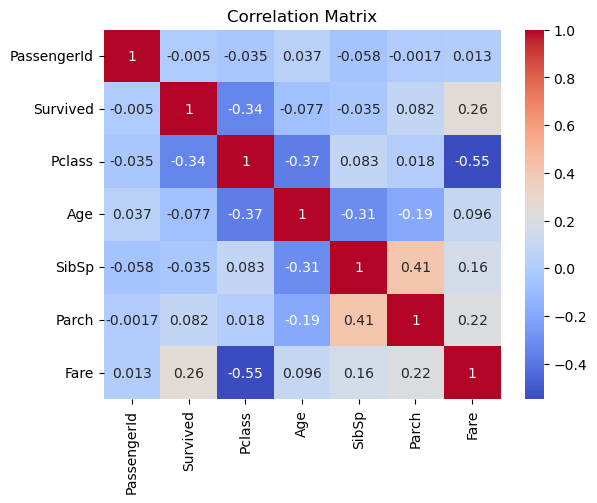

In [52]:
# Heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Observations
- **Pclass & Fare**: Strong negative correlation (-0.55).
- **Survived & Fare**: Positive correlation (0.26).
- **Survived & Pclass**: Negative correlation (-0.34).

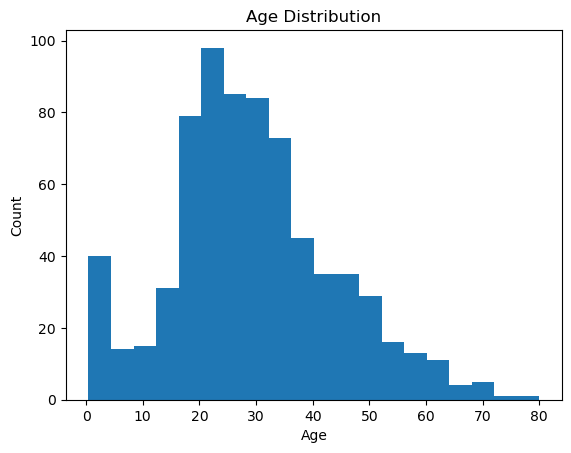

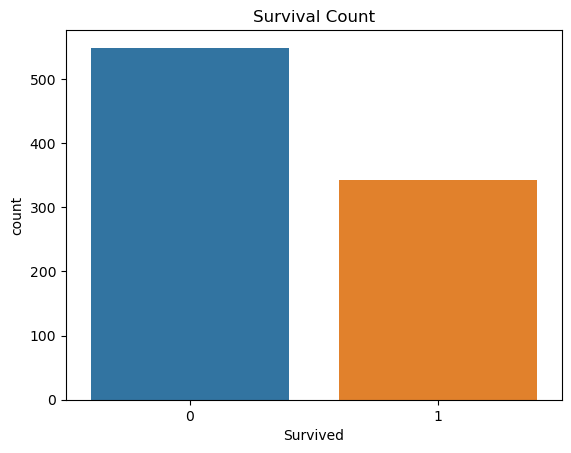

In [53]:
# Histogram of Age
plt.hist(df['Age'].dropna(), bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

# Countplot for Survival
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

### Observations
- **Age**: Most passengers are between 20–40 years old.
- **Fare**: Skewed distribution; most fares are low, with few very high.

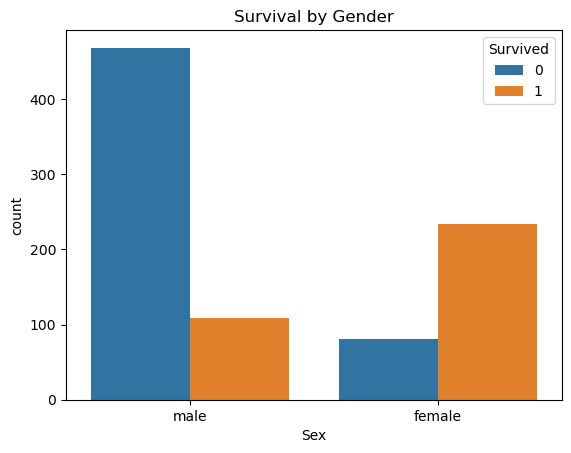

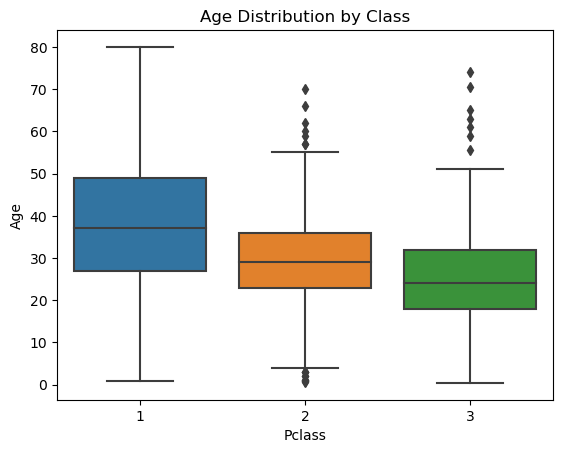

In [54]:
# Survival by Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

# Boxplot of Age vs Pclass
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Class')
plt.show()

### Observations
- **Age vs Survival**: Younger survivors more frequent; wide variation in non-survivors.
- **Fare vs Pclass**: Clear price differences by class.

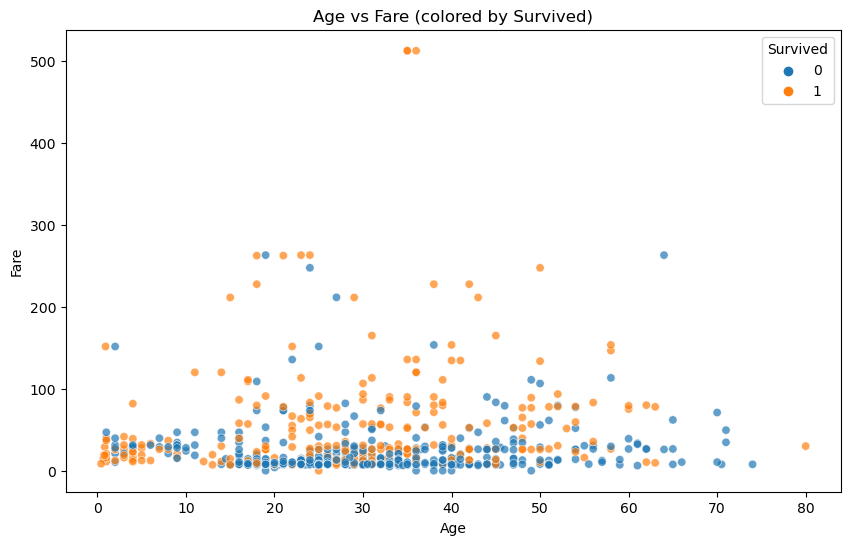

In [55]:
# --- Scatter 1: Age vs Fare colored by Survival ---
plt.figure(figsize=(10,6))
sns.scatterplot(data=df.dropna(subset=['Age','Fare']), x='Age', y='Fare', hue='Survived', alpha=0.7)
plt.title('Age vs Fare (colored by Survived)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

### Observations
- Survivors are concentrated in higher fare ranges, particularly among passengers aged 20–40.
- Non-survivors dominate the low-fare and older-age groups.
- Extremely high fares (>200) are almost entirely survivors, hinting at a strong socio-economic advantage.

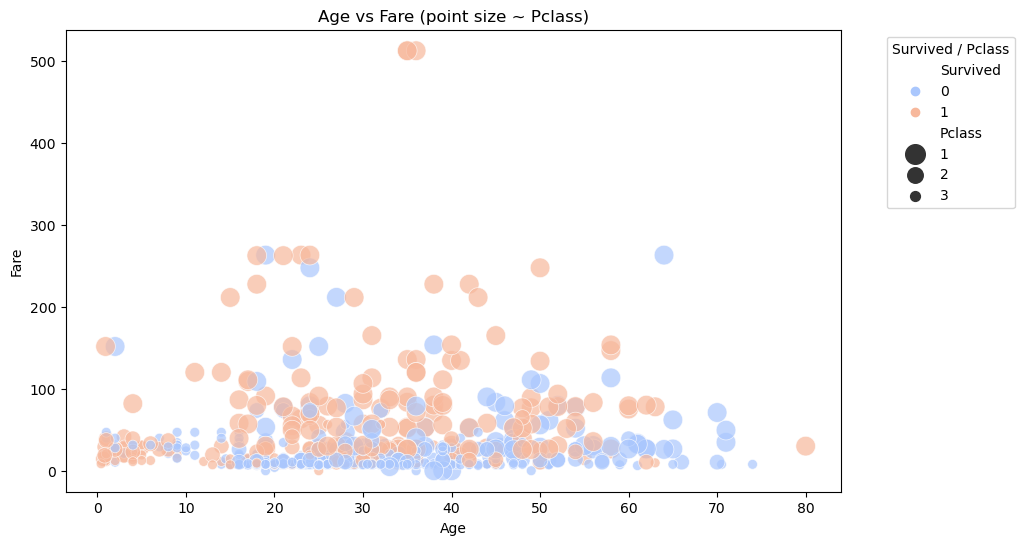

In [56]:
# --- Scatter 2: Age vs Fare, point size = Pclass ---
plt.figure(figsize=(10,6))
sns.scatterplot(data=df.dropna(subset=['Age','Fare','Pclass']), x='Age', y='Fare', hue='Survived', size='Pclass',          
    sizes=(200, 50), alpha=0.7, palette='coolwarm')
plt.title('Age vs Fare (point size ~ Pclass)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived / Pclass', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

### Observations 
- Larger points (1st class) cluster in the high-fare zone and have a higher proportion of survivors.
- Smaller points (3rd class) mostly fall in the low-fare range and have lower survival rates.
- The visual separation confirms a strong interaction between class, fare, and survival.

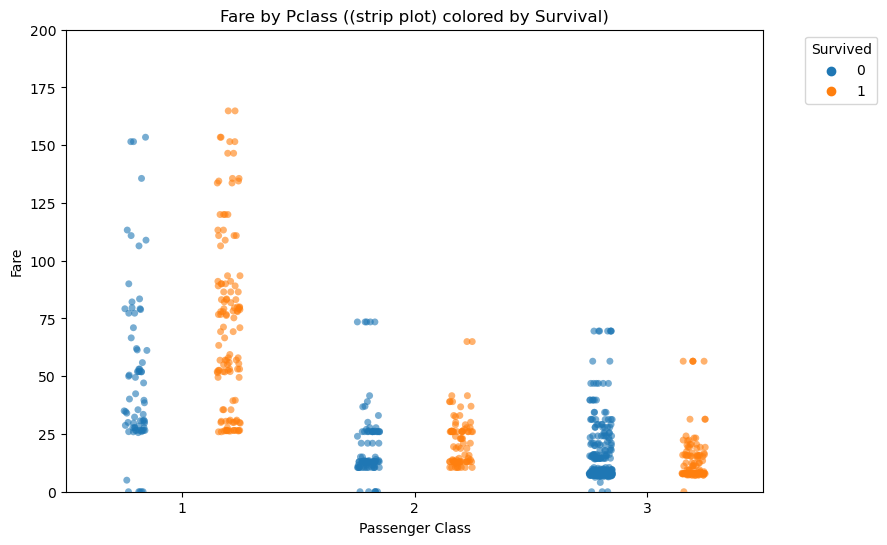

In [57]:
# --- Scatter 3: Fare vs Pclass (jittered) colored by Survival ---
plt.figure(figsize=(9,6))
sns.stripplot(
    data=df,
    x='Pclass', y='Fare',
    hue='Survived',
    jitter=True, dodge=True, alpha=0.6
)
plt.ylim(0, 200)
plt.title('Fare by Pclass ((strip plot) colored by Survival)')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.legend(title='Survived', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

### Observations
- 1st class passengers (Pclass=1) have a wide fare range but generally high survival rates.
- 3rd class passengers (Pclass=3) have low fares and the lowest survival rates.
- The overlap in fares within classes is minimal, making Pclass a clear proxy for socio-economic status.

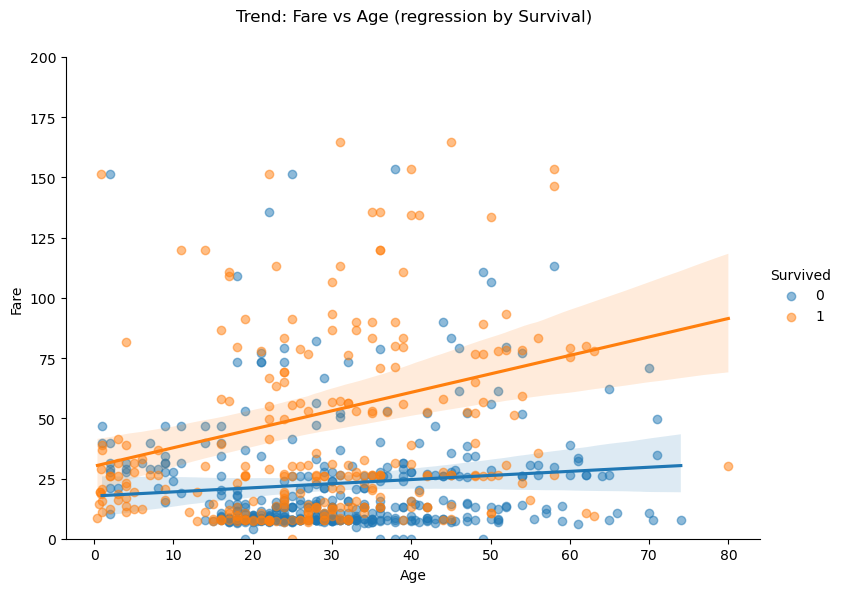

In [58]:
# --- Scatter 4: Regression/trend plot — Fare vs Age split by Survival ---
sns.lmplot(
    data=df.dropna(subset=['Age','Fare']),
    x='Age', y='Fare', hue='Survived',
    height=6, aspect=1.3, scatter_kws={'alpha':0.5}
)
plt.subplots_adjust(top=0.9)
plt.suptitle('Trend: Fare vs Age (regression by Survival)')
plt.ylim(0, 200) 
plt.show()

### Observations
- For survivors, there’s a slight negative slope: younger survivors tend to have slightly higher fares.
- For non-survivors, fares are consistently low across ages, with no strong trend.
- This suggests that fare is more predictive of survival for certain age groups, especially younger ones.

## Summary of Findings
- **Ticket Class**: Strongly affects survival; higher classes had better chances.
- **Fare**: Higher fares correlate with higher survival probability.
- **Age**: Younger passengers had a slightly higher survival rate.
- **Family Size**: Small families had better survival chances than large ones.
- **Correlations**: Pclass, Fare, and Survival have the strongest relationships.